## Paralog genes with poorly represented homozygous deletion in CCLs panel

In this step, we would identify those paralog genes with poorly represented homozygous deletion in cancer cell lines panel, especially for those with HD reprsented in only 1 or 2 CCLs.

**Input**
- Sanger CNV data with paralog genes solely: cnv_sanger_paralog.csv

**Output**
- Bar chart showing the frequency of paralog genes with HD across CCLs: barchart_HD_count.pdf
- List of paralog genes with poorly represented HD: poorly_represented_HD_gene.csv
- List of paralog genes with HD count across CCLs: paralog_gene_HD_count.csv

In [120]:
## Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
## Load the dataset 
cnv_sanger = pd.read_csv('/Users/amy/Desktop/SyntheticLethalityProject/1_data_processing/04_paralog_genes/cnv_sanger_paralog.csv', index_col=None, low_memory=False)
cnv_sanger[:2]

,BROAD_ID,SangerModelID,1,2,9,10,12,13,19,20,...,196410,393046,196446,196463,196472,196513,196527,196541,131034,327657
0,ACH-000948,SIDM00980,Neutral,Neutral,Neutral,Neutral,Gain,Neutral,Neutral,Neutral,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Gain
1,ACH-000011,SIDM01529,Neutral,Loss,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,...,Neutral,Neutral,Neutral,Neutral,Loss,Loss,Neutral,Neutral,Neutral,Neutral


If only look into breast cancer cell lines:

In [122]:
## Model information 
model_info = pd.read_csv('/Users/amy/Desktop/SyntheticLethalityProject/sources/model_list_20230307.csv', index_col=None)
model_info = model_info[['cancer_type', 'model_name', 'BROAD_ID']]

In [87]:
## If only look into breast cancer cell line
cnv_sanger = pd.merge(model_info, cnv_sanger, on=['BROAD_ID'], how= 'right')
cnv_sanger = cnv_sanger[cnv_sanger['cancer_type'] == 'Breast Carcinoma']
cnv_sanger = cnv_sanger.iloc[:,2:]
cnv_sanger[:2]

,BROAD_ID,SangerModelID,1,2,9,10,12,13,19,20,...,196410,393046,196446,196463,196472,196513,196527,196541,131034,327657
29,ACH-000248,SIDM00898,Neutral,Neutral,Loss,Loss,Neutral,Neutral,Neutral,Neutral,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Gain,Neutral,Neutral
46,ACH-000288,SIDM00122,Neutral,Neutral,Gain,Gain,Loss,Neutral,Gain,Gain,...,Loss,Loss,Loss,Loss,Loss,Neutral,Loss,Gain,Neutral,Loss


In [123]:
## BRCA cell line in Kalocsay study 
brca_cl = pd.read_csv('/Users/amy/Desktop/SyntheticLethalityProject/1_data_processing/05_poorly_represented_HD_in_CCLs/Kalocsay_brca_cl_filter.csv', index_col=None)
cnv_sanger = pd.merge(model_info, cnv_sanger, on=['BROAD_ID'], how= 'right')
brca_cl = set(brca_cl.model_name)
cnv_sanger = cnv_sanger[cnv_sanger['model_name'].isin(list(brca_cl))]
cnv_sanger = cnv_sanger.iloc[:,2:]
cnv_sanger[:2]

,BROAD_ID,SangerModelID,1,2,9,10,12,13,19,20,...,196410,393046,196446,196463,196472,196513,196527,196541,131034,327657
46,ACH-000288,SIDM00122,Neutral,Neutral,Gain,Gain,Loss,Neutral,Gain,Gain,...,Loss,Loss,Loss,Loss,Loss,Neutral,Loss,Gain,Neutral,Loss
56,ACH-000212,SIDM00940,Gain,Gain,Loss,Loss,Neutral,Gain,Neutral,Neutral,...,Loss,Neutral,Amplification,Loss,Loss,Gain,Loss,Loss,Neutral,Neutral


In [124]:
## Remove the columns in original dataframe for further processing 
df = cnv_sanger.drop(['SangerModelID', 'BROAD_ID'], axis = 1)
df[:2]

,1,2,9,10,12,13,19,20,21,22,...,196410,393046,196446,196463,196472,196513,196527,196541,131034,327657
46,Neutral,Neutral,Gain,Gain,Loss,Neutral,Gain,Gain,Loss,Loss,...,Loss,Loss,Loss,Loss,Loss,Neutral,Loss,Gain,Neutral,Loss
56,Gain,Gain,Loss,Loss,Neutral,Gain,Neutral,Neutral,Neutral,Neutral,...,Loss,Neutral,Amplification,Loss,Loss,Gain,Loss,Loss,Neutral,Neutral


In [125]:
## Counting the number of cell lines carrying homozygous deletion of particular gene
cl_count_HD = df.apply(lambda x: (x == 'Deletion').sum())
cl_count_HD

1         0
2         0
9         1
10        1
12        0
         ..
196513    0
196527    0
196541    0
131034    0
327657    0
Length: 12267, dtype: int64

In [126]:
cl_count_HD_df = cl_count_HD.to_frame().reset_index() ## Change the panda series into data frame
cl_count_HD_df = cl_count_HD_df.rename(columns = {'index':'entrez_id',0 : 'cell_line_frequency'}) ## Modify the column name

## Create a new column: cell_line_frequency_category 
cl_count_HD_df['cell_line_frequency_category'] = cl_count_HD_df['cell_line_frequency']

## Group the genes based on cell line frequency 
cl_count_HD_df.loc[cl_count_HD_df['cell_line_frequency'] >= 3, 'cell_line_frequency_category'] = '>=3'
cl_count_HD_df[:10]

,entrez_id,cell_line_frequency,cell_line_frequency_category
0,1,0,0
1,2,0,0
2,9,1,1
3,10,1,1
4,12,0,0
5,13,0,0
6,19,0,0
7,20,0,0
8,21,0,0
9,22,0,0


In [127]:
## Map the entrez ID with gene hgnc symbol

# Load the dataset 
hgnc_symbol = pd.read_csv('/Users/amy/Desktop/SyntheticLethalityProject/sources/gene_identifiers_20191101.csv', index_col=None)
hgnc_symbol = hgnc_symbol.dropna(subset=['entrez_id'])
hgnc_symbol['entrez_id'] = [str(round(x)) for x in hgnc_symbol['entrez_id']]
hgnc_symbol = hgnc_symbol[['entrez_id','hgnc_symbol']]

cl_count_HD_df = pd.merge(hgnc_symbol, cl_count_HD_df, on = ['entrez_id'], how = 'right')
cl_count_HD_df[:5]

,entrez_id,hgnc_symbol,cell_line_frequency,cell_line_frequency_category
0,1,A1BG,0,0
1,2,A2M,0,0
2,9,NAT1,1,1
3,10,NAT2,1,1
4,12,SERPINA3,0,0


In [128]:
## Save the dataset for counting the number of gene homozygous deletion 
## cl_count_HD_df.to_csv('/Users/amy/Desktop/SyntheticLethalityProject/1_data_processing/05_poorly_represented_HD_in_CCLs/paralog_gene_HD_count.csv', index = False)
## cl_count_HD_df.to_csv('/Users/amy/Desktop/SyntheticLethalityProject/1_data_processing/05_poorly_represented_HD_in_CCLs/paralog_gene_HD_count_brca.csv', index=False)
## cl_count_HD_df.to_csv('/Users/amy/Desktop/SyntheticLethalityProject/1_data_processing/05_poorly_represented_HD_in_CCLs/paralog_gene_HD_count_brca_kalocsay.csv', index=False)

**Bar chart** to visualize the distribution of homozygous deleted paralog genes across cancer cell lines. 

In [129]:
df_plot = cl_count_HD_df.cell_line_frequency_category.value_counts()

print(df_plot)

0      11708
1        501
2         38
>=3       20
Name: cell_line_frequency_category, dtype: int64


In [130]:
## Recreat a dataframe 
data = {'Paralog genes' : [11708, 501, 38, 20],
        'CCLs with homozygous deletion' : ['0', '1', '2', ' ≥ 3']}

df_plot = pd.DataFrame(data)

df_plot

,Paralog genes,CCLs with homozygous deletion
0,11708,0
1,501,1
2,38,2
3,20,≥ 3


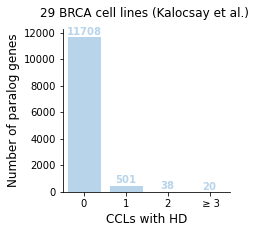

In [132]:
f, ax = plt.subplots(1,1,figsize = (3,3))
plt.suptitle('29 BRCA cell lines (Kalocsay et al.)', 
                  horizontalalignment='center', fontsize = 12)

sns.barplot(x = 'CCLs with homozygous deletion', y = 'Paralog genes', data = df_plot, ax = ax, 
            palette=["#b7d4ea"], saturation=1, edgecolor='white', width=0.8)

## Label the number of genes on the corresponding bar
ax.bar_label(ax.containers[0], color='#b7d4ea', weight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Number of paralog genes', fontsize=12)
ax.set_xlabel('CCLs with HD',fontsize=12)

## Save the figure
# f.savefig('/Users/amy/Desktop/SyntheticLethalityProject/1_data_processing/05_poorly_represented_HD_in_CCLs/barchart_HD_count.pdf', dpi=400, bbox_inches='tight') 
# f.savefig('/Users/amy/Desktop/SyntheticLethalityProject/1_data_processing/05_poorly_represented_HD_in_CCLs/barchart_HD_count_brca.pdf', dpi=400, bbox_inches='tight') 
f.savefig('/Users/amy/Desktop/SyntheticLethalityProject/1_data_processing/05_poorly_represented_HD_in_CCLs/barchart_HD_count_brca_kalocsay.pdf', dpi=400, bbox_inches='tight') 

In [11]:
## Filter the dataset cl_count_HD_df with cell line frequency equals to 1 or 2
gene = cl_count_HD_df[cl_count_HD_df['cell_line_frequency'].isin([1, 2])]
print('Number of paralog genes with HD that are only presented in 1 or 2 cell lines: ', gene.shape[0])

Number of paralog genes with HD that are only presented in 1 or 2 cell lines:  1942


In [12]:
## Save the data 
gene.to_csv('/Users/amy/Desktop/SyntheticLethalityProject/1_data_processing/05_poorly_represented_HD_in_CCLs/poorly_represented_HD_gene.csv', index=False)